In [1]:
import os
import numpy as np
import pandas as pd
print(os.getcwd())

/home/jovyan/work/fsds/group_work


In [6]:
df = pd.read_csv('/home/jovyan/work/fsds/group_work/data/airbnb/listings.csv', low_memory=False)

from sklearn.cluster import KMeans
the_count = df[['calculated_host_listings_count']]  # 使用双括号保持 DataFrame 格式


k_pref = 4  # 您选择的簇的数量
kmeans = KMeans(n_clusters=k_pref, n_init=31, random_state=42)
kmeans.fit(the_count)

# join the cluter to the origin dataframe
df['local_or_company'] = kmeans.labels_




/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


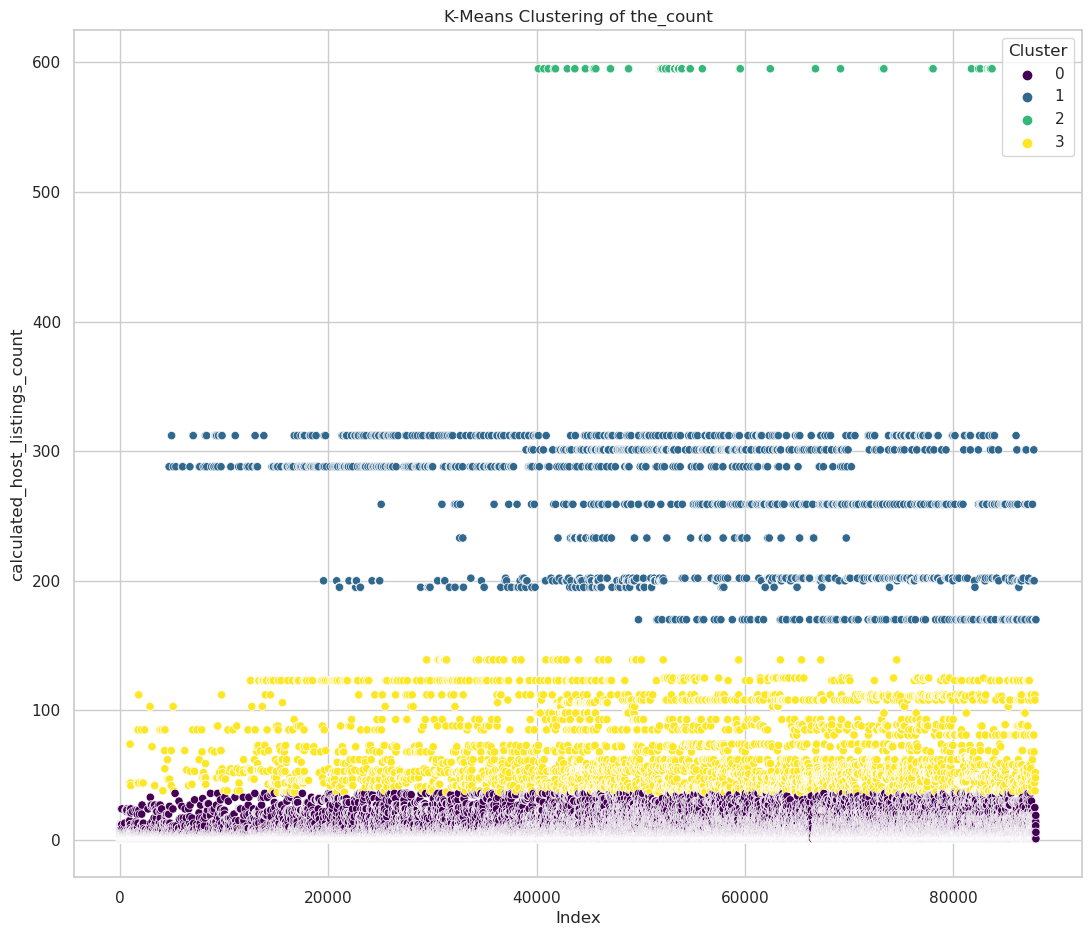

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图样式
sns.set(style="whitegrid")

# 创建散点图，其中 x 轴是索引，y 轴是 'calculated_host_listings_count' 的值，颜色由聚类标签决定
plt.figure(figsize=(13, 11))
sns.scatterplot(x=df.index, y=df['calculated_host_listings_count'], hue=df['local_or_company'], palette='viridis')

# 添加图表标题和标签
plt.title('K-Means Clustering of the_count')
plt.xlabel('Index')
plt.ylabel('calculated_host_listings_count')

# 显示图例和图表
plt.legend(title='Cluster')
plt.show()


In [14]:
# 假设 df 是您的 DataFrame
# 将 'local_or_company' 列中等于 0 的值替换为 1，其它值替换为 0
df['local_or_company'] = np.where(df['local_or_company'] == 0, 1, 0)


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

36


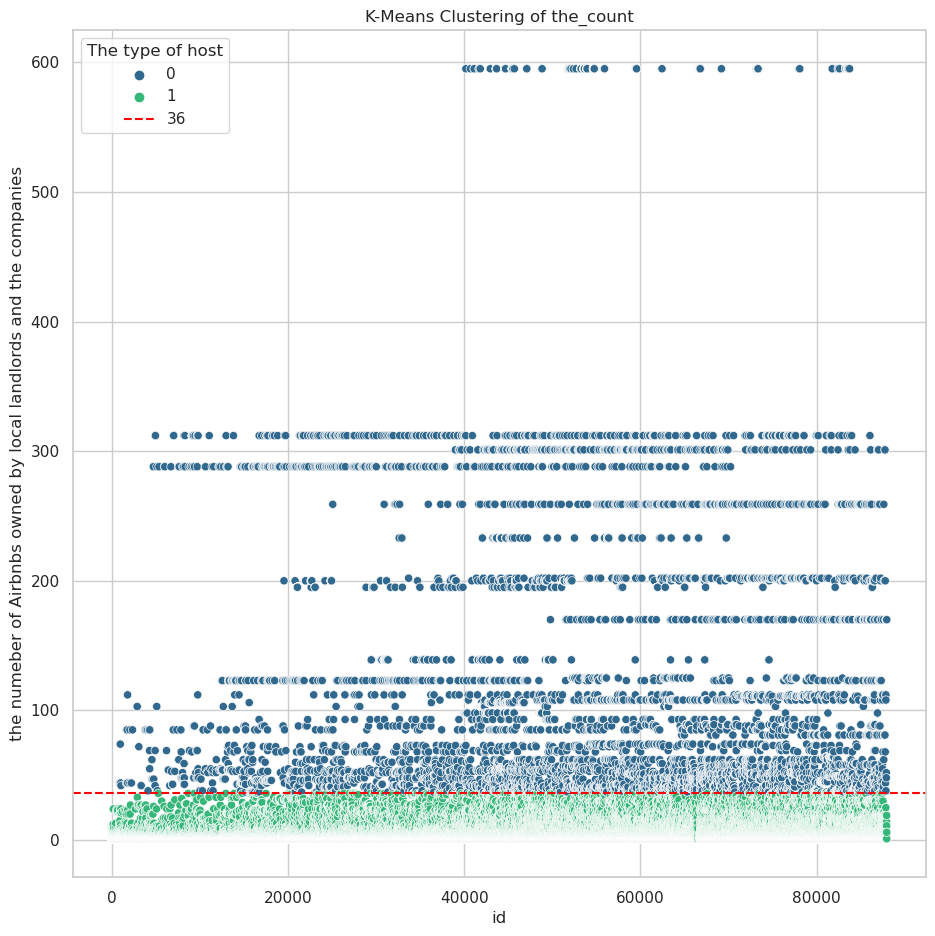

In [21]:
# 设置绘图样式
sns.set(style="whitegrid")

# 创建散点图，其中 x 轴是索引，y 轴是 'calculated_host_listings_count' 的值，颜色由聚类标签决定
plt.figure(figsize=(11, 11))
sns.scatterplot(x=df.index, y=df['calculated_host_listings_count'], hue=df['local_or_company'], palette='viridis')

# 在df中选择出是本地房东的行，然后对筛选后的数据的'calculated_host_listings_count'列求最大值，这样可以算出本地房东拥有房子数量的最大值
# 首先，选择 'local_or_company' 列中值为 1 的行代表本地房东
filtered_rows = df[df['local_or_company'] == 1]

# 然后，在这些行中找到 'b' 列的最大值
max_value_in_local_hosts = filtered_rows['calculated_host_listings_count'].max()
print(max_value_in_local_hosts)

# 在 y=max_value_in_local_hosts 的位置添加一条红色虚线，并设置标签 max value of the numeber of Airbnbs owned by local landlords
plt.axhline(y=max_value_in_local_hosts, color='red', linestyle='--', label=max_value_in_local_hosts)

# 添加图表标题和标签
plt.title('K-Means Clustering of the_count')
plt.xlabel('id')
plt.ylabel('the numeber of Airbnbs owned by local landlords and the companies')

# 显示图例和图表
plt.legend(title='The type of host')
plt.show()

In [20]:
# df 是 DataFrame，将 DataFrame 导出到当前工作目录的 CSV 文件
df.to_csv('listings_new.csv', index=False)